In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from patsy import dmatrices
import statsmodels.api as sm
from utilities import *

In [2]:
# importing the feature file
path= './'
file= 'SegmentFeatures2.csv'
data= pd.read_csv(path+file, delimiter=',')
display(data.head())

,SegmentId,RecordNum,StartingTime,RRBreach,SpO2Breach,RRHighRegions,SpO2LowRegions,Stage1OccurL,Stage2OccurL,Stage3OccurL,RRUnsafeRegions,SpO2UnsafeRegions,Stage1OccurH,Stage2OccurH,Stage3OccurH,FeatureSum,Type1Pattern
0,Seg0,3861446,30.0,0,0,0,0,2,0,1,12,7,1,0,0,23,1
1,Seg1,3861446,31.0,0,0,0,0,3,0,1,12,7,1,0,0,24,1
2,Seg2,3861446,32.0,0,0,0,0,2,0,1,12,6,1,0,0,22,1
3,Seg3,3861446,4.0,0,1,0,1,5,1,1,2,3,0,0,0,14,1
4,Seg4,3861446,8.0,0,1,0,1,4,1,1,4,4,1,0,0,17,1


In [3]:
X=data[['RRBreach', 'SpO2Breach',
       'RRHighRegions', 'SpO2LowRegions', 'Stage1OccurL', 'Stage2OccurL',
       'Stage3OccurL', 'RRUnsafeRegions', 'SpO2UnsafeRegions', 'Stage1OccurH',
       'Stage2OccurH', 'Stage3OccurH']]
X.head()

,RRBreach,SpO2Breach,RRHighRegions,SpO2LowRegions,Stage1OccurL,Stage2OccurL,Stage3OccurL,RRUnsafeRegions,SpO2UnsafeRegions,Stage1OccurH,Stage2OccurH,Stage3OccurH
0,0,0,0,0,2,0,1,12,7,1,0,0
1,0,0,0,0,3,0,1,12,7,1,0,0
2,0,0,0,0,2,0,1,12,6,1,0,0
3,0,1,0,1,5,1,1,2,3,0,0,0
4,0,1,0,1,4,1,1,4,4,1,0,0


In [4]:
Y=data[['Type1Pattern']]
Y.head()

,Type1Pattern
0,1
1,1
2,1
3,1
4,1


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/4,random_state = 10)
display(y_test['Type1Pattern'].value_counts(normalize=True) * 100)
display(y_train['Type1Pattern'].value_counts(normalize=True) * 100)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
print(np.shape(y_train))
print(np.shape(y_test))

0    51.851852
1    48.148148
Name: Type1Pattern, dtype: float64

1    50.353357
0    49.646643
Name: Type1Pattern, dtype: float64

(1132,)
(378,)


In [6]:
#MLP implementation
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=10)
clf_mlp.fit(X_train,y_train)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=10, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

[[184  12]
 [ 10 172]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       196
           1       0.93      0.95      0.94       182

    accuracy                           0.94       378
   macro avg       0.94      0.94      0.94       378
weighted avg       0.94      0.94      0.94       378



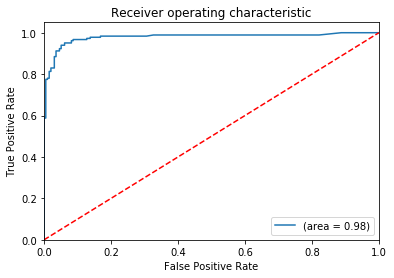

0.4809079776747087

Model Classification stats with Optimal Threshold
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       196
           1       0.93      0.95      0.94       182

    accuracy                           0.94       378
   macro avg       0.94      0.94      0.94       378
weighted avg       0.94      0.94      0.94       378



,Value
accuracy,0.941799
recall,0.945055
precision,0.934783
f1-score,0.939891
roc_auc_score,0.978583


In [7]:
metrics_analysis(X_test,y_test,clf_mlp)
optimal_threshold=plot_rocauc(X_test,y_test,clf_mlp)
print('Model Classification stats with Optimal Threshold')
display_classification_metrics(X_test,y_test,clf_mlp,optimal_threshold)

In [8]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,0.1,0.01,0.05,0.001],
    'learning_rate': ['constant','adaptive'],
    'batch_size': [50,100,200,500,1000],
    'max_iter' : [100,200,500]
}

In [9]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(MLPClassifier(random_state=10),param_grid,n_jobs=-1, verbose=1, cv=5)
model=grid.fit(X_train,y_train)

#To get best params
print(model.best_params_)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 48.2min finished


{'activation': 'relu', 'alpha': 0.01, 'batch_size': 200, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
mlp_bestparam = MLPClassifier(max_iter=100,batch_size=200,activation='relu',alpha=0.01,hidden_layer_sizes=(50, 100, 50),learning_rate='constant', solver='adam',random_state=10)
mlp_bestparam.fit(X_train,y_train)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.01, batch_size=200, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=10, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

[[184  12]
 [  8 174]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       196
           1       0.94      0.96      0.95       182

    accuracy                           0.95       378
   macro avg       0.95      0.95      0.95       378
weighted avg       0.95      0.95      0.95       378



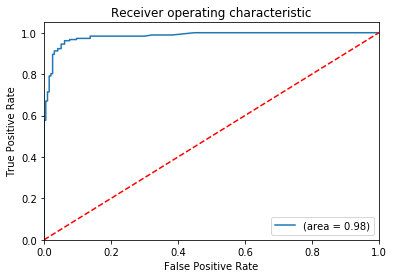

0.46913432711417025

Model Classification stats with Optimal Threshold
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       196
           1       0.94      0.96      0.95       182

    accuracy                           0.95       378
   macro avg       0.95      0.95      0.95       378
weighted avg       0.95      0.95      0.95       378



,Value
accuracy,0.947090
recall,0.956044
precision,0.935484
f1-score,0.945652
roc_auc_score,0.983460


In [11]:
metrics_analysis(X_test,y_test,mlp_bestparam)
optimal_threshold=plot_rocauc(X_test,y_test,mlp_bestparam)
print('Model Classification stats with Optimal Threshold')
display_classification_metrics(X_test,y_test,mlp_bestparam,optimal_threshold)

### -------------------Final Model-----------------------------
##### Splitting into training and testing
##### Training : 0:500 = 500
##### Training : 752:1252 = 500
##### Test: 500:752  = 252
##### Test: 1252:1510 = 258

In [12]:
# importing the feature file
datafile_path= './'
datafile_name= 'SegmentFeatures2.csv'
data= pd.read_csv(datafile_path+datafile_name, delimiter=',')
X=data[['RRBreach', 'SpO2Breach',
       'RRHighRegions', 'SpO2LowRegions', 'Stage1OccurL', 'Stage2OccurL',
       'Stage3OccurL', 'RRUnsafeRegions', 'SpO2UnsafeRegions', 'Stage1OccurH',
       'Stage2OccurH', 'Stage3OccurH']]
Y=data[['Type1Pattern']]
X_TRAIN = np.concatenate((X.values[0:500,:],X.values[752:1252,:]),axis=0)
Y_TRAIN = np.concatenate((Y.values[0:500],Y.values[752:1252]),axis=0)
Y_TRAIN = Y_TRAIN.ravel()

X_TEST = np.concatenate((X.values[500:752,:],X.values[1252:1510,:]),axis=0)
Y_TEST = np.concatenate((Y.values[500:752],Y.values[1252:1510]),axis=0)
Y_TEST = Y_TEST.ravel()
print(np.shape(X_TRAIN))
print(np.shape(Y_TRAIN))
print(np.shape(X_TEST))
print(np.shape(Y_TEST))


(1000, 12)
(1000,)
(510, 12)
(510,)


[[230  28]
 [ 26 226]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       258
           1       0.89      0.90      0.89       252

    accuracy                           0.89       510
   macro avg       0.89      0.89      0.89       510
weighted avg       0.89      0.89      0.89       510



/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


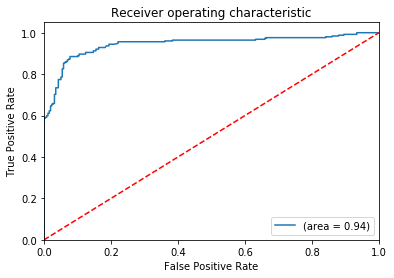

0.6931826283477683

Model Classification stats with Optimal Threshold
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       258
           1       0.92      0.88      0.90       252

    accuracy                           0.90       510
   macro avg       0.90      0.90      0.90       510
weighted avg       0.90      0.90      0.90       510



,Value
accuracy,0.901961
recall,0.880952
precision,0.917355
f1-score,0.898785
roc_auc_score,0.944621


In [13]:
mlp_bestparam = MLPClassifier(max_iter=100,batch_size=200,activation='relu',alpha=0.01,hidden_layer_sizes=(50, 100, 50),learning_rate='constant', solver='adam',random_state=10)
mlp_bestparam.fit(X_TRAIN, Y_TRAIN)

metrics_analysis(X_TEST,Y_TEST,mlp_bestparam)
optimal_threshold=plot_rocauc(X_TEST,Y_TEST,mlp_bestparam)
print('Model Classification stats with Optimal Threshold')
display_classification_metrics(X_TEST,Y_TEST,mlp_bestparam,optimal_threshold)

In [14]:
import pickle

# save the model to disk
model_path= './'
model_name = 'mlp_model.sav'
pickle.dump(mlp_bestparam, open(model_path+model_name, 'wb'))